# SIS hyperparameters
Generate an epidemic with some unknown "true" $(\lambda, \kappa)$, then try to infer them by doing a grid search and comparing the log-likelihood (negative Bethe free energy)

In [12]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, Plots, Printf, IndexedGraphs, Statistics, Random
using Base.Threads
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [4]:
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [140]:
T = 10
N = 500
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
# t = SimpleGraph(prim_mst(gg))
# g = IndexedGraph(t)
# @assert is_connected(g)
# t = binary_tree(12)
# g = IndexedGraph(t)
# N = nv(g)
# @show N
λ_true = 0.4
ρ_true = 0.2
γ = 10/N;

In [141]:
sis_true = SIS(g, λ_true, ρ_true, T; γ)
X, _ = onesample(mpbp(sis_true));

In [142]:
sum(X[:,1] .== INFECTED)

6

In [143]:
mean(X .== INFECTED)

0.3809090909090909

In [144]:
lambdas = 0.3:0.02:0.5
rhos = 0.1:0.02:0.3
f = fill!(lambdas*rhos', 0);

In [145]:
nobs = (T*N)
last_time = false
# nobs = N
# last_time = true

false

In [146]:
bp = mpbp(SIS(g, λ, ρ, T; γ))
rng = MersenneTwister(0)
draw_node_observations!(bp.ϕ, X, nobs; rng, last_time);

In [ ]:
# @telegram "sis hyperparams" begin
    
    for (i,λ) in enumerate(lambdas)
        println("## λ $i of ", length(lambdas))
        for j in eachindex(rhos)
            println("   ## ρ $j of ", length(rhos))
            ρ = rhos[j]
            for i in eachindex(bp.w)
                bp.w[i] .= (SISFactor(λ, ρ),) 
            end
#             bp = mpbp(SIS(g, λ, ρ, T; γ))
#             rng = MersenneTwister(0)
#             draw_node_observations!(bp.ϕ, X, nobs; rng, last_time)
        
            reset_messages!(bp)
            iterate!(bp; maxiter=100, tol=1e-3, showprogress=false, svd_trunc=TruncBond(5))
            f[i,j] = bethe_free_energy(bp)
#             lp, ll = logprior_loglikelihood(bp, X)
#             f[i,j] = -lp
        end
    end
    
# end

## λ 1 of 11
   ## ρ 1 of 11
   ## ρ 2 of 11
   ## ρ 3 of 11
   ## ρ 4 of 11
   ## ρ 5 of 11
   ## ρ 6 of 11
   ## ρ 7 of 11
   ## ρ 8 of 11
   ## ρ 9 of 11
   ## ρ 10 of 11


In [ ]:
println("SIS - Inference of hyperparameters for 1 realization of an epidemic with N=$N, T=$T, 
    $nobs random observations")
contour(lambdas, rhos, -f',title="log-likelihood of hyperparameters", xlabel="λ", ylabel="ρ", 
    fill=true, levels=30)
scatter!([λ_true], [ρ_true], m=:plus, label="", c=:black, msw=4, ms=6, margin=6Plots.mm)

SIS - Inference of hyperparameters for 1 realization of an epidemic with N=500, T=10, 
    5000 random observations


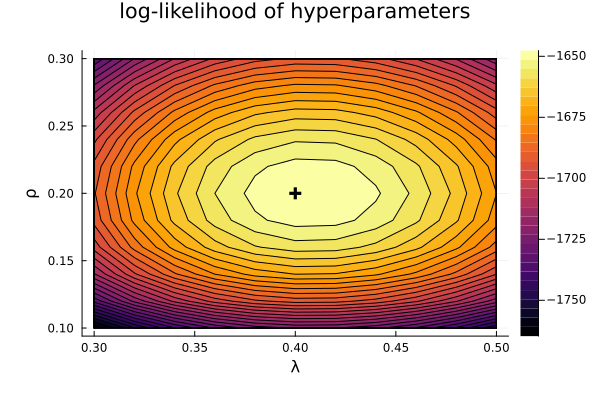

In [149]:
println("SIS - Inference of hyperparameters for 1 realization of an epidemic with N=$N, T=$T, 
    $nobs random observations")
contour(lambdas, rhos, -f',title="log-likelihood of hyperparameters", xlabel="λ", ylabel="ρ", 
    fill=true, levels=30)
scatter!([λ_true], [ρ_true], m=:plus, label="", c=:black, msw=4, ms=6, margin=6Plots.mm)